In [1]:
import os

In [10]:
speech_path = 'RAVDESS/speech'
actor = '/Actor_01_cp'

Each of the RAVDESS files has a unique filename.
The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp3).
These identifiers define characteristics: 

Filename identifiers 

1) Modality (01 = full-AV, 02 = video-only, 03 = audio-only). 

2) Vocal channel (01 = speech, 02 = song).

3) Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

4) Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

5) Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

6) Repetition (01 = 1st repetition, 02 = 2nd repetition).

7) Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [37]:
emotions_dict = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08': 'surprised'
}
intensity_dict = {
    '01':'normal',
    '02':'strong'
}

In [38]:
def isOdd(n):
    return int(n) % 2 != 0

In [39]:
for _filename in os.listdir(speech_path + actor):
    filename = _filename.split('.')[0].split('-')
    gender = 'male' if isOdd(filename[6]) else 'female'
    new_filename = emotions_dict[filename[2]] + \
        '-' + intensity_dict[filename[3]] + '-' \
        + filename[4] + '-' + filename[5] + '-' + gender + '.wav'
        
    os.rename(speech_path + actor + '/' + _filename, speech_path + actor + '/' + new_filename)

In [41]:
!pip install librosa

    100% |████████████████████████████████| 1.6MB 473kB/s ta 0:00:01
    100% |████████████████████████████████| 276kB 1.0MB/s ta 0:00:011
    100% |████████████████████████████████| 327kB 1.7MB/s ta 0:00:011
    100% |████████████████████████████████| 3.2MB 231kB/s ta 0:00:011    60% |███████████████████▌            | 1.9MB 3.6MB/s eta 0:00:01
    100% |████████████████████████████████| 16.1MB 49kB/s eta 0:00:011    92% |█████████████████████████████▋  | 14.9MB 4.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for librosa ... done
  Stored in directory: /home/lovely/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5cd75596cf14c25bb6b3ea1ecd815f058b7e
  Running setup.py bdist_wheel for audioread ... done
  Stored in directory: /home/lovely/.cache/pip/wheels/53/02/90/7b5c4081b7470c550ab605f600bad237dde12a6b8999b11f50
  Running setup.py bdist_wheel for resampy ... done
  Stored in directory: /home/lovely/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
Successfully 

In [64]:
os.listdir(speech_path + actor)

['neutral-normal-01-01-male.wav',
 'happy-normal-02-01-male.wav',
 'angry-normal-01-01-male.wav',
 'disgust-strong-02-02-male.wav',
 'neutral-normal-02-02-male.wav',
 'angry-normal-01-02-male.wav',
 'sad-strong-01-01-male.wav',
 'calm-strong-01-02-male.wav',
 'calm-normal-01-02-male.wav',
 'calm-normal-02-02-male.wav',
 'neutral-normal-01-02-male.wav',
 'surprised-normal-02-01-male.wav',
 'disgust-normal-01-01-male.wav',
 'angry-normal-02-01-male.wav',
 'fearful-normal-02-01-male.wav',
 'surprised-normal-02-02-male.wav',
 'happy-strong-01-02-male.wav',
 'fearful-normal-01-02-male.wav',
 'angry-strong-01-02-male.wav',
 'fearful-normal-02-02-male.wav',
 'fearful-strong-01-01-male.wav',
 'sad-strong-01-02-male.wav',
 'surprised-strong-02-02-male.wav',
 'disgust-normal-01-02-male.wav',
 'calm-normal-02-01-male.wav',
 'happy-strong-02-02-male.wav',
 'fearful-strong-01-02-male.wav',
 'calm-strong-01-01-male.wav',
 'calm-strong-02-01-male.wav',
 'happy-normal-01-02-male.wav',
 'surprised-stro

In [59]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
from scipy.io.wavfile import read as read_wav

In [72]:
# sampling_rate, data=read_wav(speech_path+actor+'/'+ 'angry-normal-01-01-male.wav') 

In [43]:
librosa.feature.mfcc??

In [ ]:
# http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

In [ ]:
# angry

In [79]:
data, sr = librosa.load(speech_path+actor+'/'+ 'angry-strong-01-01-male.wav', sr=48000)

In [80]:
data.shape, sr

((196997,), 48000)

In [81]:
S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)

In [82]:
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)

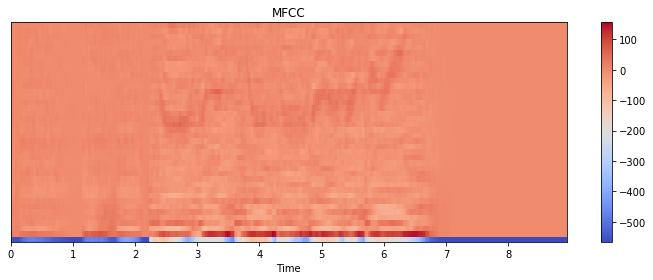

In [83]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

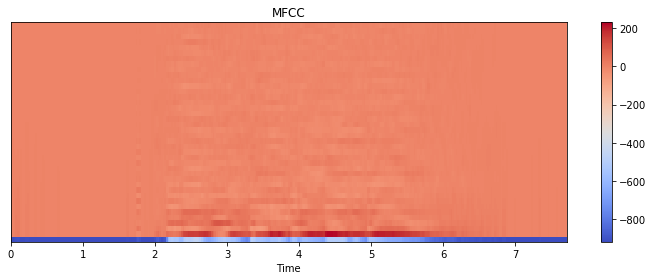

In [84]:
data, sr = librosa.load(speech_path+actor+'/'+ 'calm-normal-01-01-male.wav', sr=48000)
S = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [44]:
# y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)

In [61]:
# librosa.feature.mfcc(S=librosa.power_to_db(S))